# Process Renovar SO2 Data according to reference station

## Constants and imports

In [231]:
input_data_directory = 'data/output/'
SENSOR_1_NAME = 'alpha_so2_1_conc'
SENSOR_2_NAME = 'alpha_so2_2_conc'
SENSOR_NAME = 'alpha_so2_conc'
sensor_1_data_path = input_data_directory + SENSOR_1_NAME + '_dataframe.csv'
sensor_2_data_path = input_data_directory + SENSOR_2_NAME + '_dataframe.csv'
temperature_data_path = input_data_directory + 'chamber_tempdataframe.csv'
temperature_data_path_1HR = input_data_directory + 'chamber_tempdataframe_1hr.csv'

## Load Alphasense SO2 (1) sensor data

In [232]:
import pandas as pd

sensor_data = pd.read_csv(sensor_1_data_path)
sensor_data['DateTime'] = pd.to_datetime(sensor_data['DateTime'], infer_datetime_format=True)
sensor_data = sensor_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_data.index = sensor_data['DateTime']
sensor_data = sensor_data.drop(columns='DateTime')
sensor_data = sensor_data[['value', 'Tag']].rename(columns={'value': 'measuring 1', 'Tag': 'Tag 1'})
sensor_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_203/2542705798.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_data['DateTime'] = pd.to_datetime(sensor_data['DateTime'], infer_datetime_format=True)


,measuring 1,Tag 1
DateTime,,
2022-11-20 13:45:00,NaN,STABILIZING
2022-11-20 14:00:00,NaN,STABILIZING
2022-11-20 14:15:00,NaN,STABILIZING
2022-11-20 14:30:00,NaN,STABILIZING
2022-11-20 14:45:00,NaN,STABILIZING


## Load Alphasense SO2 (2) sensor data

In [233]:
import pandas as pd

sensor_2_data = pd.read_csv(sensor_2_data_path)
sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)
sensor_2_data = sensor_2_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
sensor_2_data.index = sensor_2_data['DateTime']
sensor_2_data = sensor_2_data.drop(columns='DateTime')
sensor_2_data = sensor_2_data[['value', 'Tag']].rename(columns={'value': 'measuring 2', 'Tag': 'Tag 2'})
sensor_2_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_203/2079243632.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sensor_2_data['DateTime'] = pd.to_datetime(sensor_2_data['DateTime'], infer_datetime_format=True)


,measuring 2,Tag 2
DateTime,,
2022-11-21 12:15:00,157.584806,STABILIZING
2022-11-21 12:30:00,155.803002,STABILIZING
2022-11-21 12:45:00,154.296330,STABILIZING
2022-11-21 13:00:00,151.793944,STABILIZING
2022-11-21 13:15:00,148.492367,STABILIZING


## Load sensor chamber temperature data

In [234]:
import pandas as pd

temperature_data = pd.read_csv(temperature_data_path)
temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)
temperature_data = temperature_data.sort_values(by='DateTime', ascending=True).reset_index().drop(columns='index')
temperature_data.index = temperature_data['DateTime']
temperature_data = temperature_data.drop(columns='DateTime')
temperature_data = temperature_data[['measuring', 'Tag']]
temperature_data = temperature_data.rename(columns={'measuring': 'temperature', 'Tag': 'Temperature Tag'})
temperature_data.head()

/var/folders/wc/_83zcrx913j1dqwg4g90kbhh0000gp/T/ipykernel_203/2292504063.py:4: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  temperature_data['DateTime'] = pd.to_datetime(temperature_data['DateTime'], infer_datetime_format=True)


,temperature,Temperature Tag
DateTime,,
2022-11-21 10:45:00,NaN,MISSING
2022-11-21 11:00:00,NaN,MISSING
2022-11-21 11:15:00,NaN,MISSING
2022-11-21 11:30:00,30.375,VALID
2022-11-21 11:45:00,30.715,VALID


## Merge sensor and temperature data

In [235]:
merged_data = pd.concat([sensor_data, sensor_2_data, temperature_data], axis=1, join='outer')
sensor_data = merged_data
sensor_data['Temperature Tag'] = sensor_data['Temperature Tag'].fillna(value='VALID')
sensor_data['Tag 1'] = sensor_data['Tag 1'].fillna(value='VALID')
sensor_data['Tag 2'] = sensor_data['Tag 2'].fillna(value='VALID')
sensor_data['Hour'] = sensor_data.index.hour
sensor_data.head()

,measuring 1,Tag 1,measuring 2,Tag 2,temperature,Temperature Tag,Hour
DateTime,,,,,,,
2022-11-20 13:45:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,13
2022-11-20 14:00:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:15:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:30:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14
2022-11-20 14:45:00,NaN,STABILIZING,NaN,VALID,NaN,VALID,14


## Plot concentration and temperature

<Axes: xlabel='DateTime'>

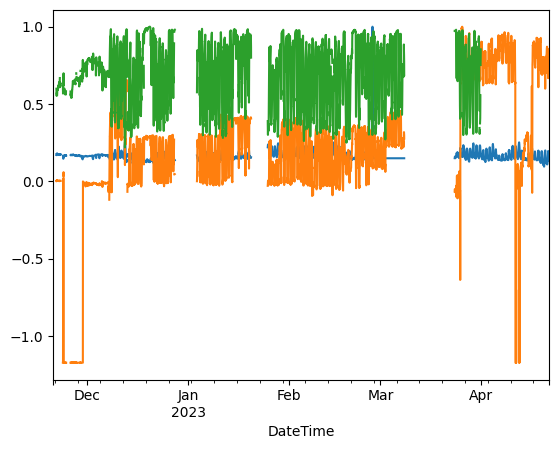

In [236]:
import numpy as np

max_temp_value = sensor_data['temperature'].max()
max_conc_value_1 = sensor_data['measuring 1'].max()
max_conc_value_2 = sensor_data['measuring 2'].max()
sensor_data['temperature'].apply(lambda v: v/max_temp_value if not np.isnan(v) else v).plot()
sensor_data['measuring 1'].apply(lambda v: v/max_conc_value_1 if not np.isnan(v) else v).plot()
sensor_data['measuring 2'].apply(lambda v: v/max_conc_value_2 if not np.isnan(v) else v).plot()

## Tag concentration data according to environmental tag

In [237]:
from SensorDataAnalysisService import SensorDataAnalysisService as sensor_analysis

def tag_by_env_tag(sensor_1_tag, sensor_2_tag, env_tag):
    if sensor_1_tag != 'VALID': return sensor_1_tag
    if sensor_2_tag != 'VALID': return sensor_2_tag
    if env_tag != 'VALID': return 'INVALID_ENV'
    return 'VALID'

tags_dataframe = sensor_data[['Tag 1', 'Tag 2', 'Temperature Tag']]
sensor_data['Tag'] = tags_dataframe.apply(lambda df: tag_by_env_tag(df[0], df[1], df[2]), axis=1)
sensor_data = sensor_data.drop(columns=['Tag 1', 'Tag 2', 'Temperature Tag'])
tags = ['MISSING','LTLL', 'GTUL', 'BADSPIKE', 'VALID', 'LTQTLE01', 'GTQTLE99', 'INVALID_ENV']
data_contabilization = sensor_analysis.count_tags(tags, sensor_data)
data_contabilization

,#,%
MISSING,2901,19.835897
LTLL,2214,15.138462
GTUL,6027,41.210256
BADSPIKE,121,0.82735
VALID,2390,16.34188
LTQTLE01,122,0.834188
GTQTLE99,102,0.697436
INVALID_ENV,75,0.512821
TOTAL,14625,100.0


<Axes: xlabel='DateTime'>

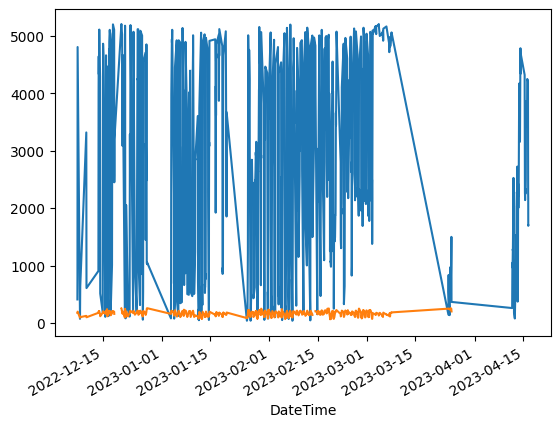

In [238]:
sensor_data[sensor_data['Tag'] == 'VALID']['measuring 1'].plot()
sensor_data[sensor_data['Tag'] == 'VALID']['measuring 2'].plot()

## Analyse data

In [239]:
valid_dataframe = sensor_data[sensor_data['Tag'] == 'VALID'].drop(columns=['Tag'])
valid_dataframe.head()

,measuring 1,measuring 2,temperature,Hour
DateTime,,,,
2022-12-07 18:30:00,410.810540,177.433574,28.075,18
2022-12-07 18:45:00,553.367929,178.796130,27.920,18
2022-12-07 19:00:00,800.108422,180.381411,27.730,19
2022-12-07 19:15:00,1622.594200,184.076033,27.500,19
2022-12-07 19:30:00,2889.220727,189.107008,27.270,19


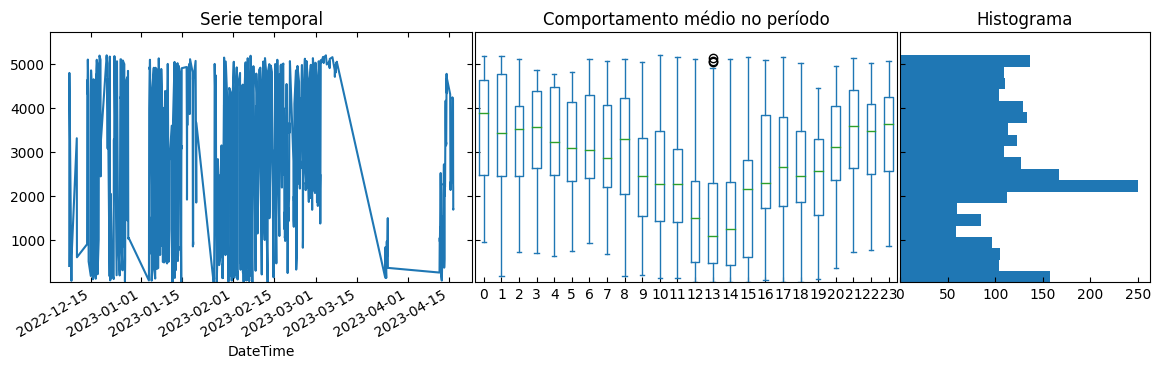

In [240]:
dataframe = valid_dataframe.rename(columns={'measuring 1': 'measuring'})
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

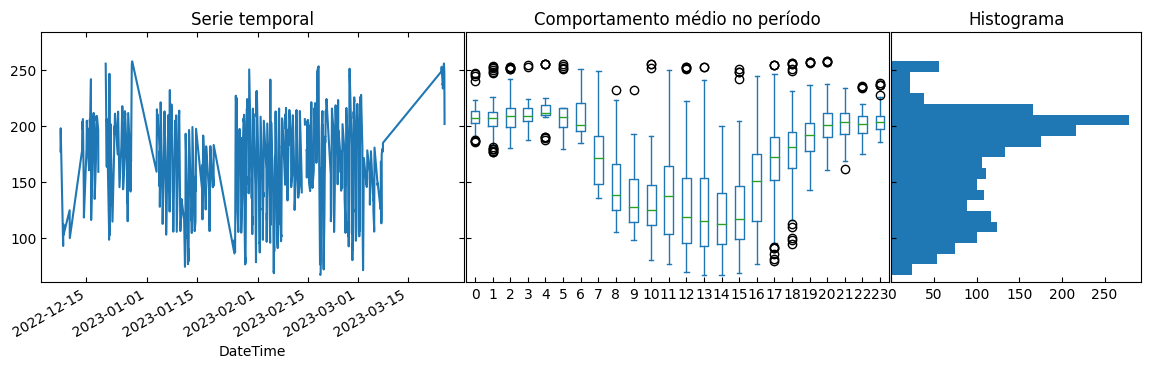

In [241]:
dataframe = valid_dataframe.rename(columns={'measuring 2': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

## Plot sensor 1 vs. temperature

Spearmans correlation coefficient: -0.426
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.426
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.301, p<0.05")

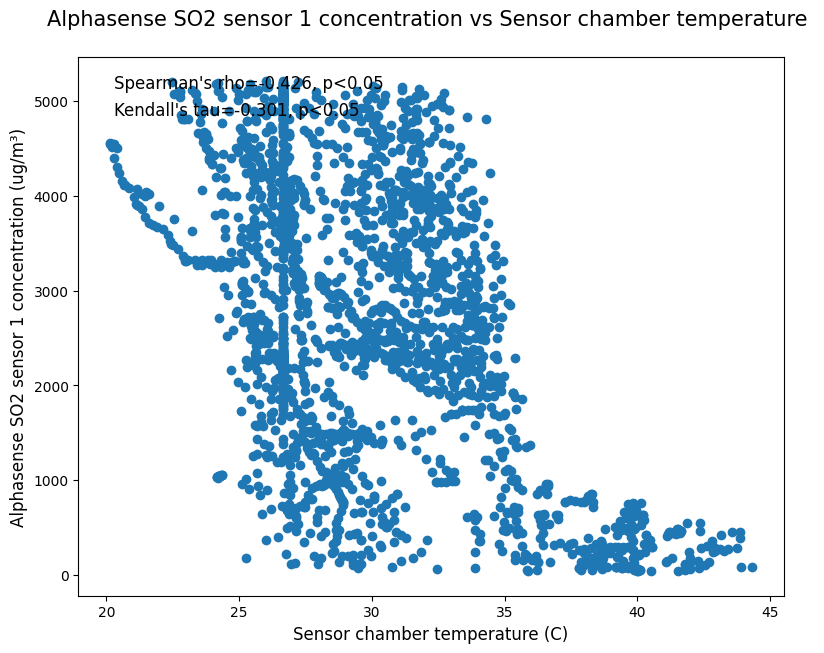

In [242]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['temperature'], valid_dataframe['measuring 1'])
plt.title('Alphasense SO2 sensor 1 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor 1 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['temperature'], valid_dataframe['measuring 1'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( valid_dataframe['temperature'], valid_dataframe['measuring 1'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

Spearmans correlation coefficient: -0.463
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: -0.463
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=-0.336, p<0.05")

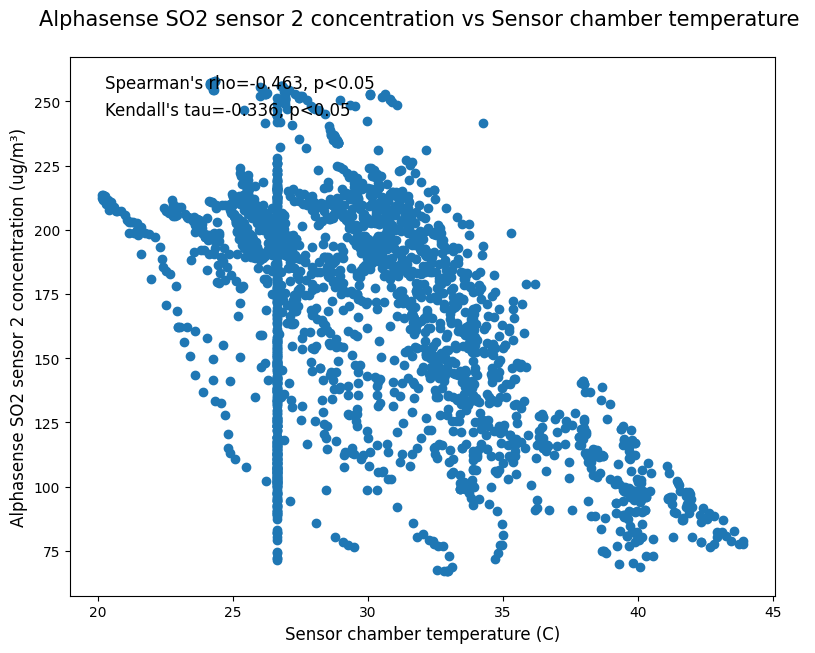

In [243]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['temperature'], valid_dataframe['measuring 2'])
plt.title('Alphasense SO2 sensor 2 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor 2 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['temperature'], valid_dataframe['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau( valid_dataframe['temperature'], valid_dataframe['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

## Apply Kalman filter

### Sensor 1

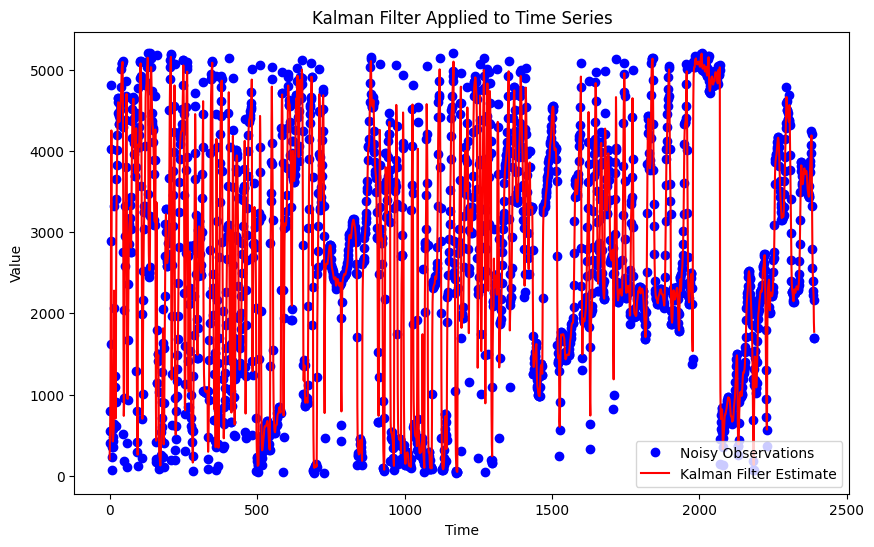

In [244]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Simulate noisy observations
observations = valid_dataframe['measuring 1'].to_numpy()

# Apply Kalman filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Estimate state and covariance matrices
state_means, state_covariances = kf.filter(observations)

# Plot the original data, true values, and the Kalman filter estimate
plt.figure(figsize=(10, 6))
plt.plot(observations, label='Noisy Observations', marker='o', linestyle='None', color='blue')
plt.plot(state_means, label='Kalman Filter Estimate', linestyle='-', color='red')

plt.title('Kalman Filter Applied to Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

<Axes: xlabel='DateTime'>

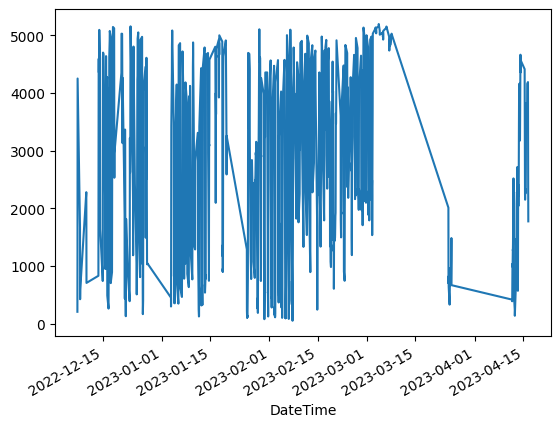

In [245]:
filter_series = pd.Series(state_means.flatten())
filter_series.index = valid_dataframe.index
valid_dataframe['raw measuring 1'] = valid_dataframe['measuring 1']
valid_dataframe['measuring 1'] = filter_series
filter_series.plot()

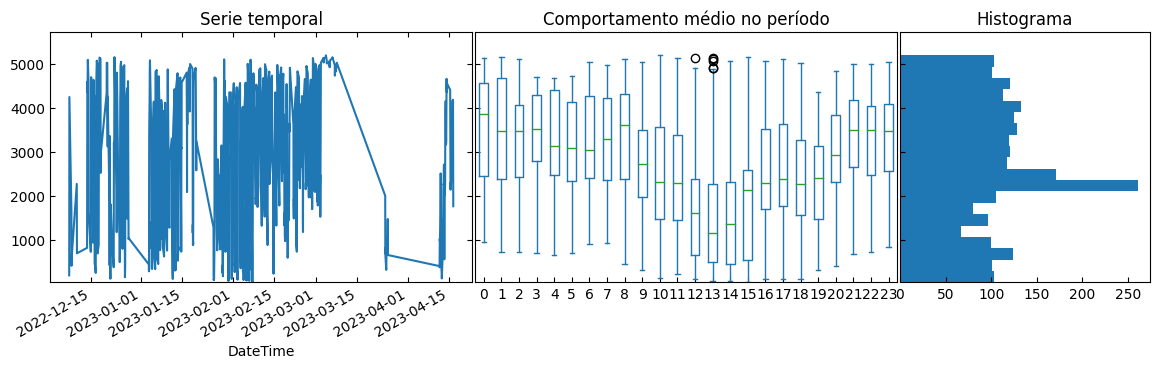

In [246]:
dataframe = valid_dataframe.rename(columns={'measuring 1': 'measuring'})
dataframe['Hour'] = dataframe.index.hour
sensor_analysis.plot_box_hist(df=dataframe, bins=20)

### Sensor 2

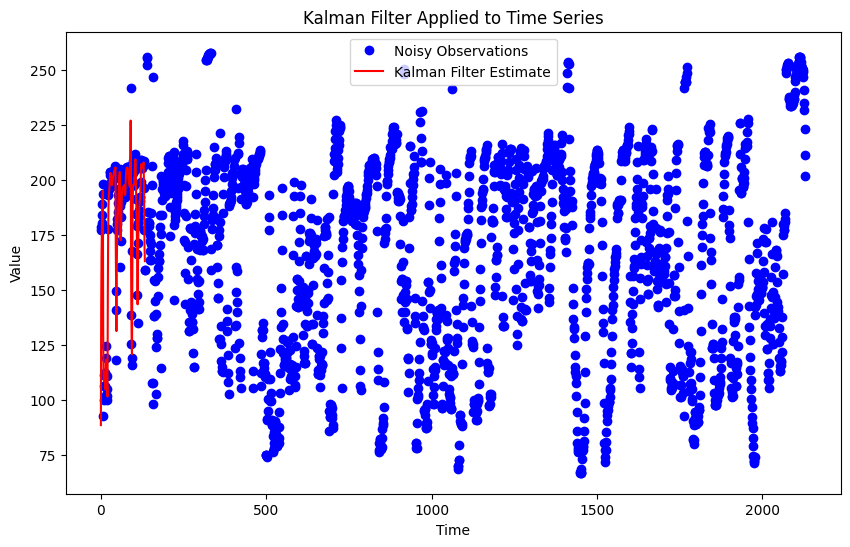

In [247]:
import numpy as np
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Simulate noisy observations
observations = valid_dataframe['measuring 2'].to_numpy()

# Apply Kalman filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Estimate state and covariance matrices
state_means, state_covariances = kf.filter(observations)

# Plot the original data, true values, and the Kalman filter estimate
plt.figure(figsize=(10, 6))
plt.plot(observations, label='Noisy Observations', marker='o', linestyle='None', color='blue')
plt.plot(state_means, label='Kalman Filter Estimate', linestyle='-', color='red')

plt.title('Kalman Filter Applied to Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

## Decompose signal

### Sensor 1

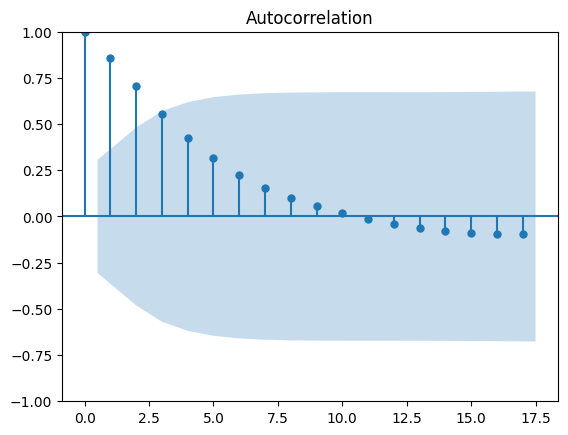

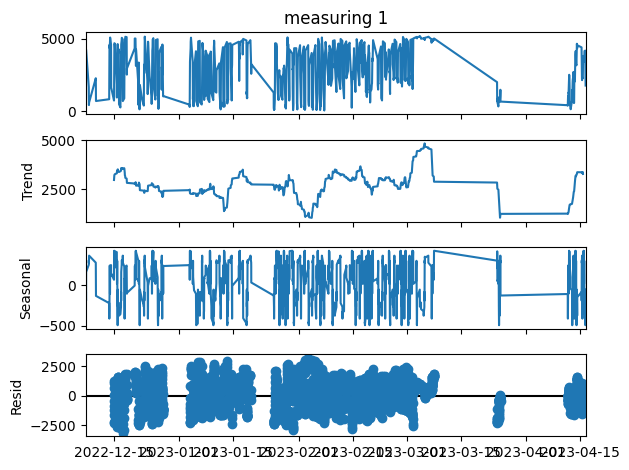

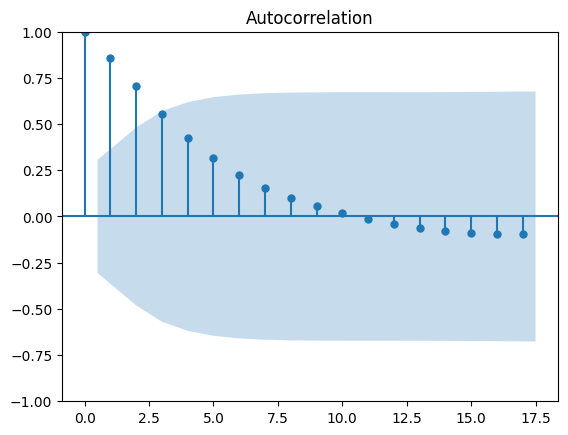

In [248]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots

signal = seasonal_decompose(valid_dataframe['measuring 1'].fillna(value=valid_dataframe['measuring 1'].median()), 
                                 model='additive', period=4*24)
signal.plot()
tsaplots.plot_acf(acf(signal.resid.dropna(), nlags=40, fft=False))


#### Analyse residuals

Shapiro-Wilk test statistic: 0.993736207485199
Shapiro-Wilk test p-value: 2.5876520481915577e-08
The sample does not look normally distributed (reject H0)


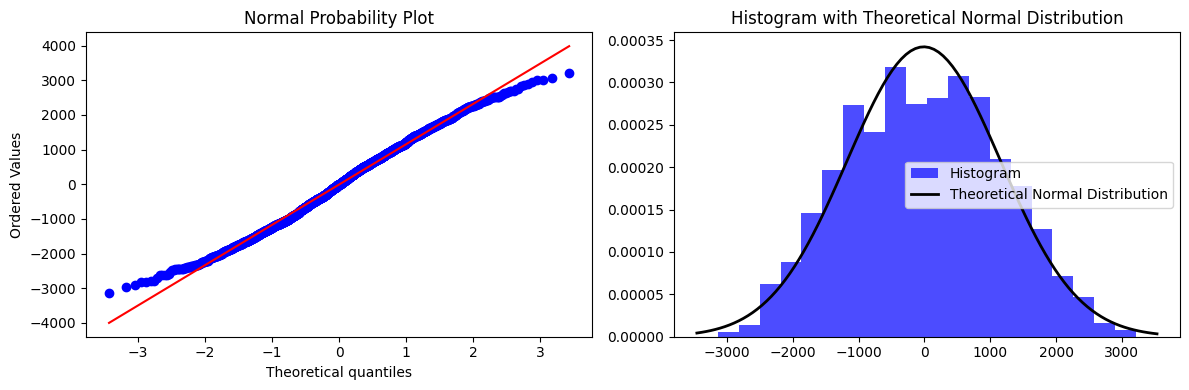

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, shapiro

# Test for normality in the residuals
residuals = signal.resid.dropna()  # Drop NaN values introduced by decomposition

# Test for normality using Shapiro-Wilk test
stat, p_value = shapiro(residuals)

# Display the results
print(f"Shapiro-Wilk test statistic: {stat}")
print(f"Shapiro-Wilk test p-value: {p_value}")

# Check the null hypothesis
alpha = 0.05
if p_value > alpha:
    print("The sample looks normally distributed (fail to reject H0)")
else:
    print("The sample does not look normally distributed (reject H0)")

# Create a normal probability plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
probplot(residuals, plot=plt)
plt.title('Normal Probability Plot')

# Create a histogram with a theoretical normal distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, density=True, alpha=0.7, color='blue', label='Histogram')

# Add a theoretical normal distribution to the histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - np.mean(residuals)) / np.std(residuals))**2) / (np.std(residuals) * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2, label='Theoretical Normal Distribution')

plt.title('Histogram with Theoretical Normal Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [250]:
valid_dataframe['Trend'] = signal.trend
valid_dataframe['Seasonal Component'] = signal.seasonal
valid_dataframe['Trend and Seasonal Component'] = signal.trend + signal.seasonal
valid_dataframe['Residuals'] = signal.resid
valid_dataframe.head()

,measuring 1,measuring 2,temperature,Hour,raw measuring 1,Trend,Seasonal Component,Trend and Seasonal Component,Residuals
DateTime,,,,,,,,,
2022-12-07 18:30:00,205.405270,177.433574,28.075,18,410.810540,NaN,-270.156243,NaN,NaN
2022-12-07 18:45:00,414.182865,178.796130,27.920,18,553.367929,NaN,-147.400762,NaN,NaN
2022-12-07 19:00:00,651.675515,180.381411,27.730,19,800.108422,NaN,-82.902694,NaN,NaN
2022-12-07 19:15:00,1251.360586,184.076033,27.500,19,1622.594200,NaN,-162.895141,NaN,NaN
2022-12-07 19:30:00,2263.521347,189.107008,27.270,19,2889.220727,NaN,-190.123041,NaN,NaN


#### Analyse trend

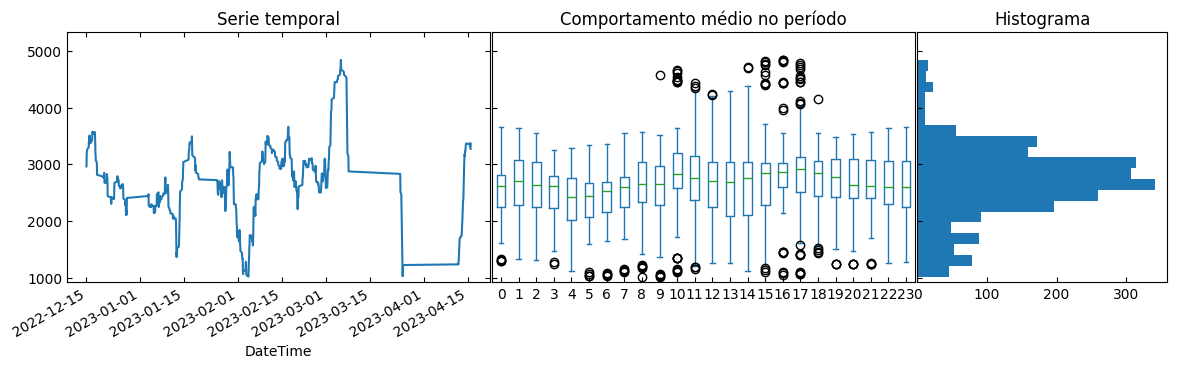

In [251]:
df = valid_dataframe[['Trend', 'Hour']].rename(columns={'Trend': 'measuring'})
sensor_analysis.plot_box_hist(df=df, bins=20)

### Sensor 2

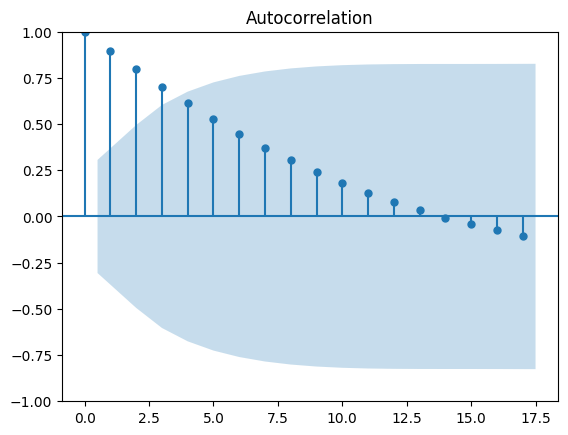

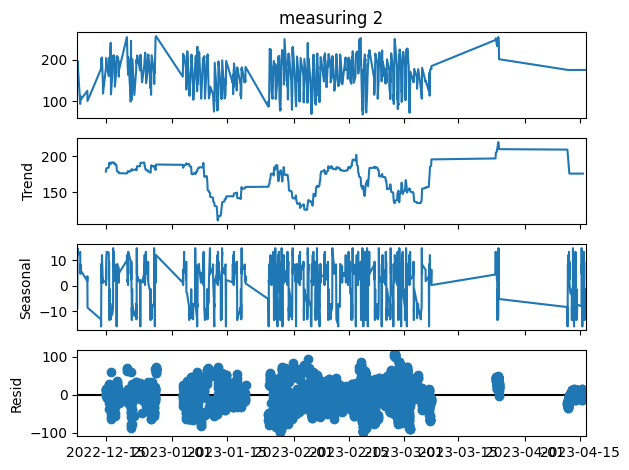

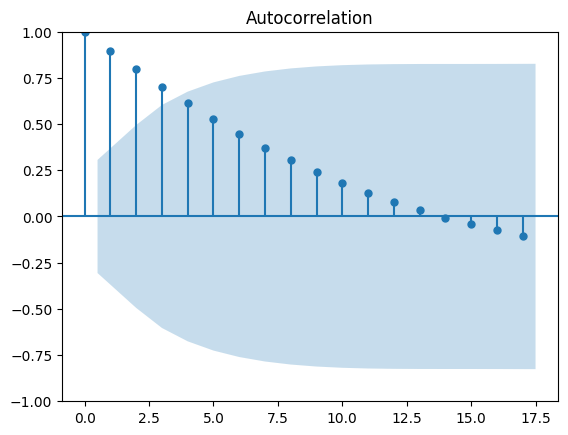

In [252]:
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics import tsaplots

signal = seasonal_decompose(valid_dataframe['measuring 2'].fillna(value=valid_dataframe['measuring 2'].median()), 
                                 model='additive', period=4*24)
signal.plot()
tsaplots.plot_acf(acf(signal.resid.dropna(), nlags=40, fft=False))


#### Analyse residuals

Shapiro-Wilk test statistic: 0.9957783818244934
Shapiro-Wilk test p-value: 4.571786575979786e-06
The sample does not look normally distributed (reject H0)


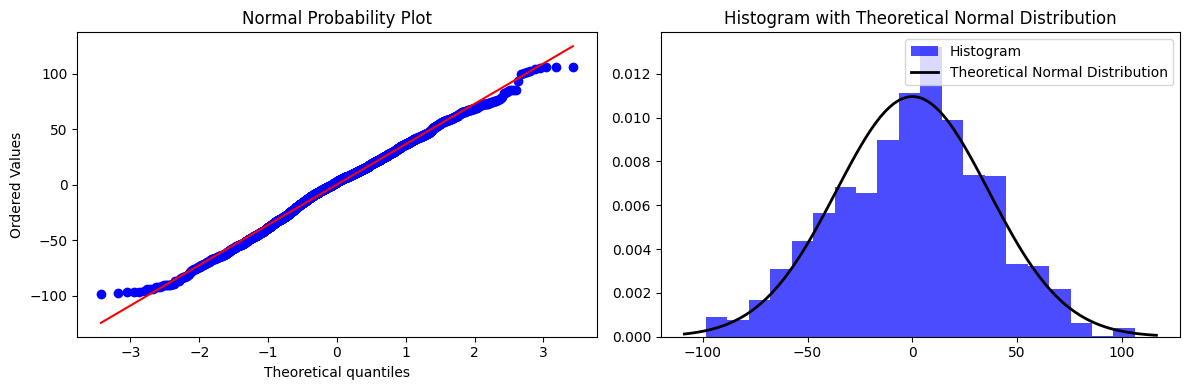

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import probplot, shapiro

# Test for normality in the residuals
residuals = signal.resid.dropna()  # Drop NaN values introduced by decomposition

# Test for normality using Shapiro-Wilk test
stat, p_value = shapiro(residuals)

# Display the results
print(f"Shapiro-Wilk test statistic: {stat}")
print(f"Shapiro-Wilk test p-value: {p_value}")

# Check the null hypothesis
alpha = 0.05
if p_value > alpha:
    print("The sample looks normally distributed (fail to reject H0)")
else:
    print("The sample does not look normally distributed (reject H0)")

# Create a normal probability plot
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
probplot(residuals, plot=plt)
plt.title('Normal Probability Plot')

# Create a histogram with a theoretical normal distribution
plt.subplot(1, 2, 2)
plt.hist(residuals, bins=20, density=True, alpha=0.7, color='blue', label='Histogram')

# Add a theoretical normal distribution to the histogram
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-0.5 * ((x - np.mean(residuals)) / np.std(residuals))**2) / (np.std(residuals) * np.sqrt(2 * np.pi))
plt.plot(x, p, 'k', linewidth=2, label='Theoretical Normal Distribution')

plt.title('Histogram with Theoretical Normal Distribution')
plt.legend()

plt.tight_layout()
plt.show()

In [254]:
valid_dataframe['Trend 2'] = signal.trend
valid_dataframe['Seasonal Component 2'] = signal.seasonal
valid_dataframe['Trend and Seasonal Component 2'] = signal.trend + signal.seasonal
valid_dataframe['Residuals 2'] = signal.resid
valid_dataframe.head()

,measuring 1,measuring 2,temperature,Hour,raw measuring 1,Trend,Seasonal Component,Trend and Seasonal Component,Residuals,Trend 2,Seasonal Component 2,Trend and Seasonal Component 2,Residuals 2
DateTime,,,,,,,,,,,,,
2022-12-07 18:30:00,205.405270,177.433574,28.075,18,410.810540,NaN,-270.156243,NaN,NaN,NaN,-8.635624,NaN,NaN
2022-12-07 18:45:00,414.182865,178.796130,27.920,18,553.367929,NaN,-147.400762,NaN,NaN,NaN,-7.262469,NaN,NaN
2022-12-07 19:00:00,651.675515,180.381411,27.730,19,800.108422,NaN,-82.902694,NaN,NaN,NaN,-8.008515,NaN,NaN
2022-12-07 19:15:00,1251.360586,184.076033,27.500,19,1622.594200,NaN,-162.895141,NaN,NaN,NaN,-6.224266,NaN,NaN
2022-12-07 19:30:00,2263.521347,189.107008,27.270,19,2889.220727,NaN,-190.123041,NaN,NaN,NaN,1.285820,NaN,NaN


### Analyse trend

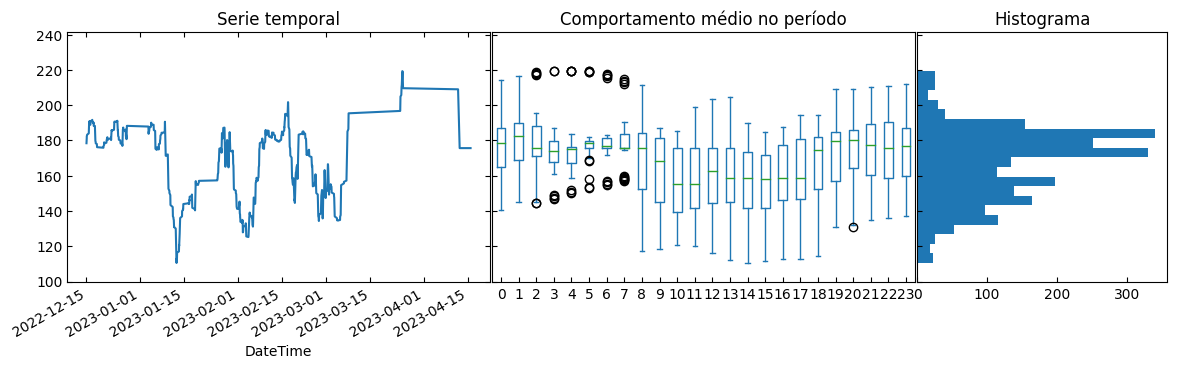

In [255]:
df = valid_dataframe[['Trend 2', 'Hour']].rename(columns={'Trend 2': 'measuring'})
sensor_analysis.plot_box_hist(df=df, bins=20)

## Plot sensor 1 vs. sensor 2

Spearmans correlation coefficient: 0.466
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.466
Samples are correlated (reject H0) p=0.000


Text(0.05, 0.9, "Kendall's tau=0.335, p<0.05")

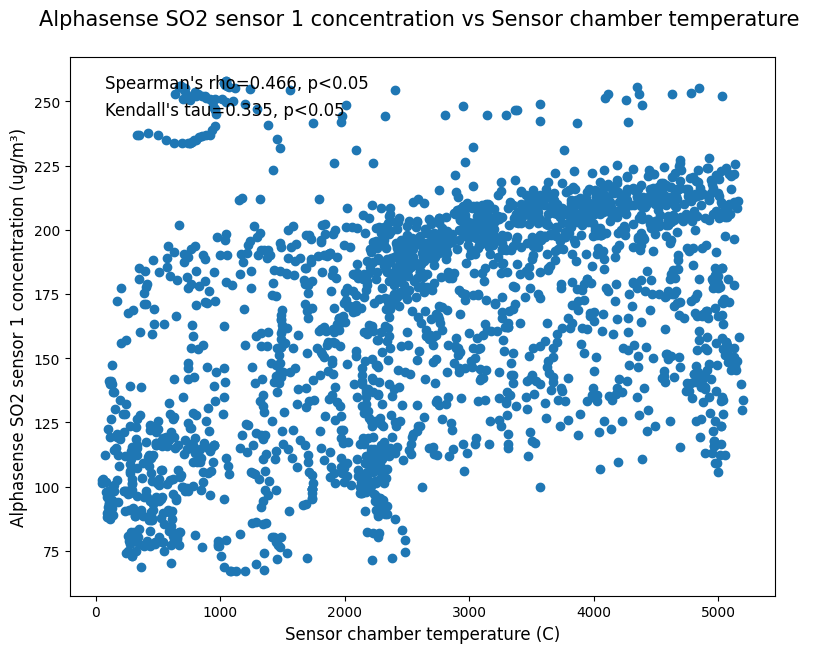

In [256]:
from scipy.stats import spearmanr
from scipy.stats import kendalltau
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(1.3*7,7))
plt.scatter(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'])
plt.title('Alphasense SO2 sensor 1 concentration vs Sensor chamber temperature \n', 
          fontdict={'fontsize':15})
plt.xlabel('Sensor chamber temperature (C)', 
           fontsize=12)
plt.ylabel('Alphasense SO2 sensor 1 concentration (ug/m\N{SUPERSCRIPT THREE})', 
           fontsize=12)
coef, p = spearmanr(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                    nan_policy='omit')
print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)

kendall, pken = kendalltau(valid_dataframe['measuring 1'], valid_dataframe['measuring 2'], 
                            nan_policy='omit')
print('Kendall correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p)
 
string = 'Spearman\'s rho=%.3f, p<0.05' % coef
plt.text(0.05, 0.95, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)
string = 'Kendall\'s tau=%.3f, p<0.05' % kendall
plt.text(0.05, 0.90, string, horizontalalignment='left', fontsize=12,
         verticalalignment='center', transform=ax.transAxes)

# Resample Data

,measuring 1,measuring 2,temperature,Hour,raw measuring 1,Trend,Seasonal Component,Trend and Seasonal Component,Residuals,Trend 2,Seasonal Component 2,Trend and Seasonal Component 2,Residuals 2,Count 1,Count 2
DateTime,,,,,,,,,,,,,,,
2022-12-07 18:30:00,309.794068,178.114852,27.99750,18,482.089234,NaN,-208.778502,NaN,NaN,NaN,-7.949047,NaN,NaN,2,2
2022-12-07 19:30:00,1879.564510,186.866652,27.39125,19,2334.044792,NaN,-104.498518,NaN,NaN,NaN,0.473560,NaN,NaN,4,4
2022-12-07 20:30:00,4250.834783,198.068432,26.87500,20,4806.533103,NaN,163.760554,NaN,NaN,NaN,11.979107,NaN,NaN,1,1
2022-12-07 21:30:00,NaN,NaN,NaN,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0
2022-12-07 22:30:00,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


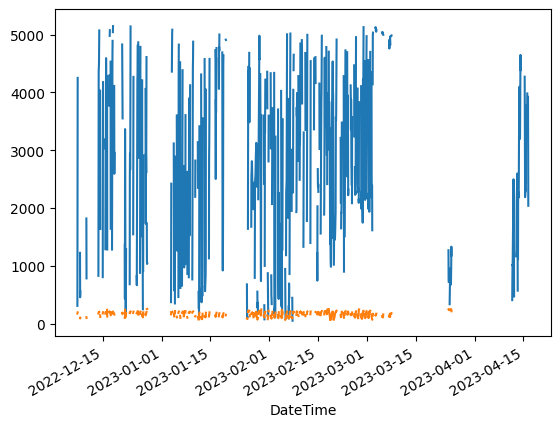

In [257]:
data_1HR = valid_dataframe.resample('H').mean()
data_1HR['Hour'] = data_1HR.index.hour
data_1HR['Count 1'] = (valid_dataframe['measuring 1'].resample('H').count())
data_1HR['Count 2'] = (valid_dataframe['measuring 2'].resample('H').count())
data_1HR.index = data_1HR.index.map(lambda t: t.replace(minute=30, second=0))
data_1HR['measuring 1'].plot()
data_1HR['measuring 2'].plot()
data_1HR.head()

#### Tag hourly data according to the number of samples in an hour
At least 3 samples must be valid in an hour (75 %) for the hourly data be considered as valid

<Axes: xlabel='DateTime'>

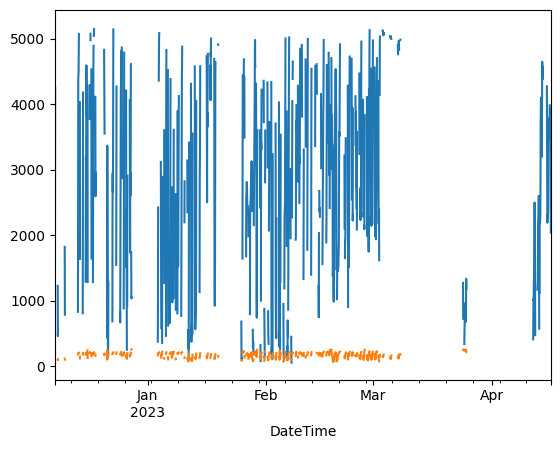

In [258]:
data_1HR['Tag'] = (data_1HR[['Count 1', 'Count 2']].apply(lambda df: 'VALID' if (df[0] >= 3 or df[1] >= 3) else 'LOWSAMPLES', 
                                                            axis=1))
data_1HR['measuring 1'].resample('H').mean().plot()
data_1HR['measuring 2'].resample('H').mean().plot()

#### Valid data contabilization

In [259]:
tags = ['LOWSAMPLES','VALID'] 
data_contabilization = sensor_analysis.count_tags(tags, data_1HR)
data_contabilization

,#,%
LOWSAMPLES,2570,82.557019
VALID,543,17.442981
TOTAL,3113,100.0


In [260]:
valid_data_1HR = data_1HR[data_1HR['Tag'] == 'VALID']

# Save Data

In [261]:
import os

output_directory_path = 'data/output/'
processing_directory_path = '../data-processing/input/'
valid_filename = '_and_temp_valid.csv'
valid_filename_1HR = '_and_temp_valid_1HR.csv'

valid_1HR_file_path_output = output_directory_path + SENSOR_NAME + valid_filename_1HR
valid_file_path_output = output_directory_path + SENSOR_NAME + valid_filename

valid_processing_1HR_file_path = processing_directory_path + SENSOR_NAME + valid_filename_1HR
valid_processing_file_path = processing_directory_path + SENSOR_NAME + valid_filename

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

if not os.path.exists(processing_directory_path):
    os.makedirs(processing_directory_path)

valid_dataframe.to_csv(valid_file_path_output)
valid_data_1HR.to_csv(valid_1HR_file_path_output)

valid_dataframe.to_csv(valid_processing_file_path)
valid_data_1HR.to_csv(valid_processing_1HR_file_path)